In [23]:
import pickle as pk
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from pandas import read_csv

In [24]:
with open('census.pkl','rb') as f:
    X_train, y_train, X_test, y_test = pk.load(f)

In [25]:
X_train.shape, y_train.shape

((27676, 108), (27676,))

In [26]:
census_unprocessed_data = read_csv('census.csv')
census_unprocessed_data.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
#check the number of classes == number of layers
census_unprocessed_data['income'].nunique()

2

In [28]:
#define the number of neurons per layer
(len(census_unprocessed_data.columns)-1+census_unprocessed_data['income'].nunique())/2

8.0

In [ ]:
neuralnet_census = MLPClassifier(max_iter=1500, verbose=False, solver='sgd',
                                activation='relu',tol=0.00001 ,hidden_layer_sizes=(8,8))
neuralnet_census.fit(X_train, y_train)

In [47]:
predictions = neuralnet_census.predict(X_test)

In [48]:
#check accuracy of our model
print('The precision of this model is:',round(accuracy_score(y_test,predictions),2)*100,'%')

The precision of this model is: 85.0 %


In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3693
        >50K       0.71      0.60      0.65      1192

    accuracy                           0.84      4885
   macro avg       0.79      0.76      0.77      4885
weighted avg       0.84      0.84      0.84      4885



0.8429887410440123

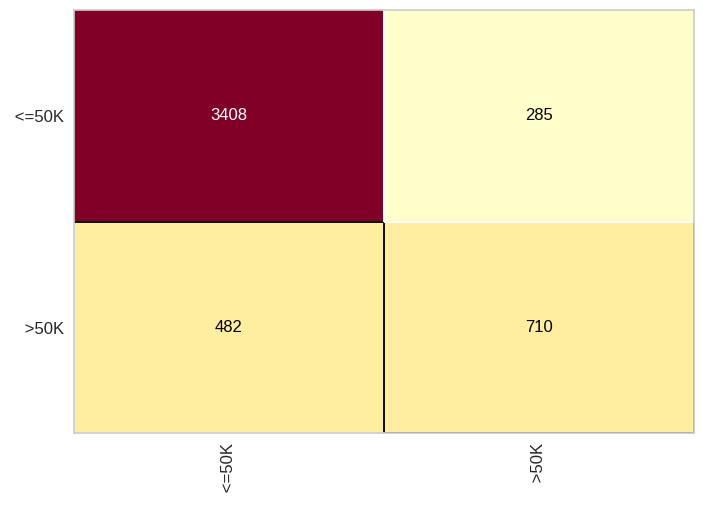

In [33]:
cm = ConfusionMatrix(neuralnet_census)
cm.fit(X_train, y_train)
cm.score(X_test,y_test)

In [35]:
#lets compare with SVM 
from sklearn.svm import SVC
svm_census = SVC(kernel='rbf',random_state=1,C=1)
svm_census.fit(X_train,y_train)

SVC(C=1, random_state=1)

In [37]:
svm_predictions = svm_census.predict(X_test)
#check accuracy of our model
print('The precision of this model is:',round(accuracy_score(y_test,svm_predictions),2)*100,'%')

The precision of this model is: 85.0 %


0.8493346980552713

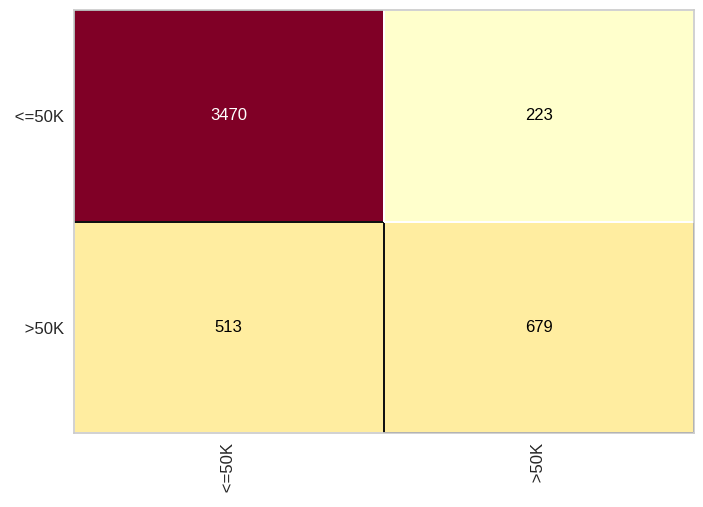

In [38]:
cm = ConfusionMatrix(svm_census)
cm.fit(X_train, y_train)
cm.score(X_test,y_test)